<a href="https://colab.research.google.com/github/giovanirojascuela/2025_5TO01/blob/CristhianA/TALLER/Dia%2003/Practica%2006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CREA Y ENTRENA UNA RED NEURONAL CON PHYTON Y TENSORFLOW

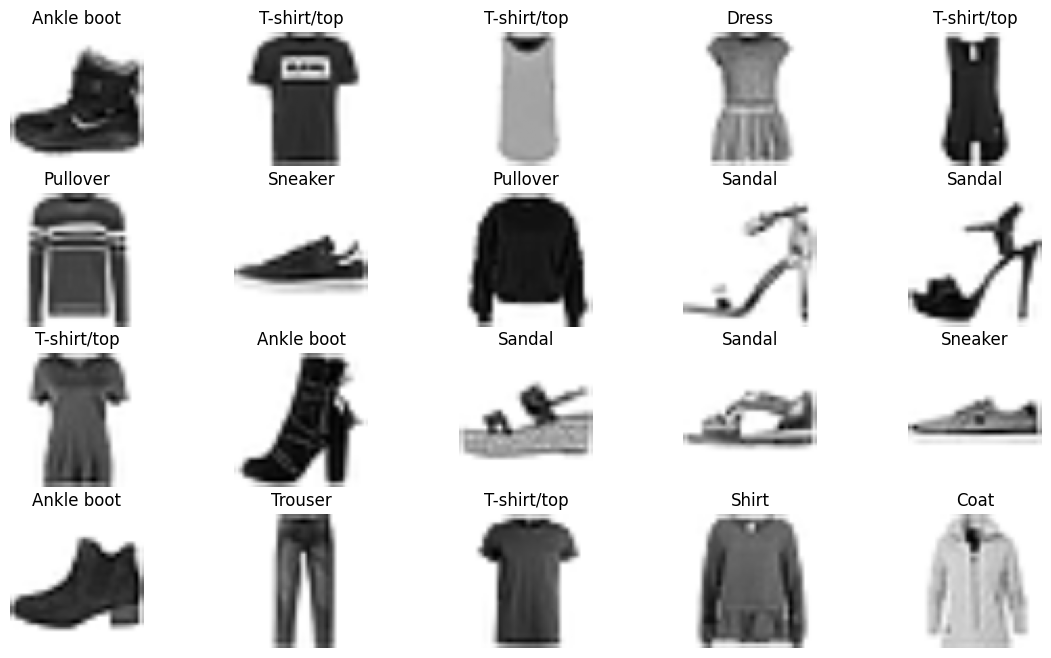

In [7]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize

(xt, yt), (xtest, ytest) = fashion_mnist.load_data()
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
xt_resized = np.array([resize(image, (64, 64), anti_aliasing=True) for image in xt])
plt.figure(figsize=(14, 8))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(xt_resized[i], cmap="binary")
    plt.title(labels[yt[i]])
    plt.axis('off')
plt.show()


### Normalizacion


In [9]:
#nORMALIZACION
xt,xtest = xt/255.0, xtest/255.0


### Definicino de arquitectura de la red neuronal

In [10]:
from tensorflow import keras
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# Compilar modelo
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

### Entrenar modelo

In [12]:
model.fit(xt,yt,epochs=10,validation_data=(xtest,ytest))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7826 - loss: 0.6235 - val_accuracy: 0.8410 - val_loss: 0.4365
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8628 - loss: 0.3787 - val_accuracy: 0.8621 - val_loss: 0.3822
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8792 - loss: 0.3351 - val_accuracy: 0.8714 - val_loss: 0.3550
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8854 - loss: 0.3109 - val_accuracy: 0.8740 - val_loss: 0.3526
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8928 - loss: 0.2906 - val_accuracy: 0.8775 - val_loss: 0.3373
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8965 - loss: 0.2777 - val_accuracy: 0.8743 - val_loss: 0.3469
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9035 - loss: 0.2598 - val_accuracy: 0.8765 - val_loss: 0.3533
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9049 - loss: 0.25

### Evaluar Modelo

In [13]:
#Evaluar modelo
test_loss, test_acc = model.evaluate(xtest, ytest, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8807 - loss: 0.3370

Test accuracy: 0.8806999921798706
